In [1]:
# Modules related to the learning curve
from sklearn.model_selection import learning_curve

In [2]:
test = %run 03准备一个更好的训练集.ipynb

train accuracy: 0.834671
test accuracy: 0.820896


In [3]:
train_X.head()
train_y.head()

,SibSp,Parch,Fare,family_size,is_mother,onehot_male,onehot_female,onehot_Age_0_16,onehot_Age_16_32,onehot_Age_32_48,onehot_Age_48_64,onehot_Age_64_,onehot_Master,onehot_Miss,onehot_Mr,onehot_Mrs,onehot_Rare,onehot_pclass_1,onehot_pclass_2,onehot_pclass_3
0,1,0,7.2500,2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,0,71.2833,2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0,0,7.9250,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,0,53.1000,2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,8.0500,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

# Draw the learning curve

## Construct SVM and LR models

In [4]:
svc = SVC()
lr = LogisticRegression()

In [6]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator = lr,
                               X = train_X,
                               y = train_y,
                               train_sizes = np.linspace(0.1, 1.0, 10),
                               cv = 5,
                               n_jobs = 1)

train_sizes
train_scores
test_scores

array([ 71, 142, 213, 284, 356, 427, 498, 569, 640, 712])

array([[0.85915493, 0.83098592, 0.83098592, 0.83098592, 0.83098592],
       [0.8028169 , 0.83098592, 0.83098592, 0.83098592, 0.83098592],
       [0.81220657, 0.85915493, 0.83568075, 0.83568075, 0.83568075],
       [0.81338028, 0.83098592, 0.82042254, 0.82042254, 0.82042254],
       [0.81741573, 0.82865169, 0.83707865, 0.83707865, 0.83707865],
       [0.81030445, 0.81498829, 0.82201405, 0.83372365, 0.83372365],
       [0.81526104, 0.8253012 , 0.81927711, 0.8313253 , 0.8313253 ],
       [0.81195079, 0.81898067, 0.82073814, 0.82073814, 0.82601054],
       [0.81875   , 0.8234375 , 0.8296875 , 0.83125   , 0.8265625 ],
       [0.83286517, 0.8244382 , 0.83286517, 0.83426966, 0.81882022]])

array([[0.66480447, 0.81460674, 0.78651685, 0.78089888, 0.79775281],
       [0.79329609, 0.82022472, 0.79775281, 0.7752809 , 0.81460674],
       [0.79888268, 0.81460674, 0.80898876, 0.76966292, 0.83146067],
       [0.82122905, 0.81460674, 0.81460674, 0.78089888, 0.85393258],
       [0.83240223, 0.81460674, 0.82022472, 0.78089888, 0.85393258],
       [0.83240223, 0.80898876, 0.82022472, 0.7752809 , 0.85393258],
       [0.83240223, 0.81460674, 0.80898876, 0.78089888, 0.85955056],
       [0.82681564, 0.80898876, 0.80337079, 0.79213483, 0.85955056],
       [0.83798883, 0.82022472, 0.80337079, 0.79213483, 0.85955056],
       [0.83240223, 0.81460674, 0.79775281, 0.79213483, 0.85393258]])

Text(0.5, 0, 'Number of trainning samples')

Text(0, 0.5, 'Accuracy')

(0.6, 1.0)

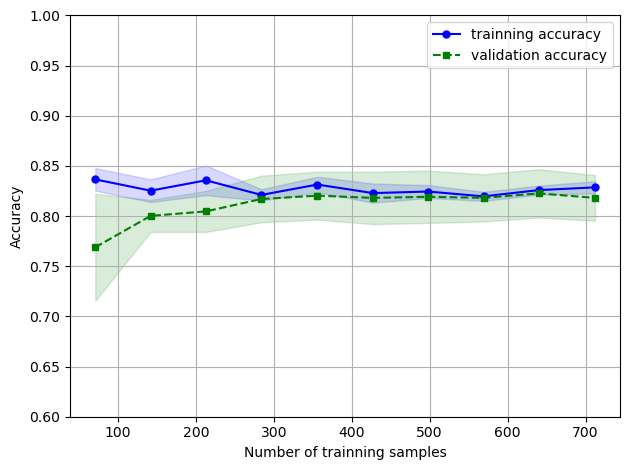

In [8]:
# Calculate the mean and variance of the accuracy of the training set and the test set
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plot the accuracy of the training set
plt.plot(train_sizes, train_mean,
         color = 'blue', marker = 'o',
         markersize = 5, label = 'trainning accuracy')

# Plot the confidence range (upper and lower bounds) for the training set accuracy:
# Upper bound: train_mean + train_std,
# Lower bound: train_mean - train_std
plt.fill_between(train_sizes,
         train_mean + train_std,
         train_mean - train_std,
         alpha = 0.15, color = 'blue')

# Perform the same operation on the test set
plt.plot(train_sizes, test_mean,
         color = 'green', linestyle = '--',
         marker = 's', markersize = 5,
         label = 'validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of trainning samples')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.6, 1])
plt.tight_layout()

plt.show()